# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

Solution for 1.

MSE = $\frac{1}{n} \sum_{i=1}^n (y_i - \hat{Y_i})^2$
Calculate the square difference between true and predicted values for each pair: 
$1.(500-450)^2 = 50^2 = 2500$
$2. (300-350)^2 = (-50)^2 = 2500$
$3. (800-780)^2 = 20^2 = 400$
$4. (400-420)^2 = (-20)^2 = 400$
$5. (6000-910)^2 = 5090^2 = 25908100$

Then sum all differences: $(2500+2500+400+400+25908100=25913900)$

Since n=5 the MSE will be:

MSE $= \frac{25913900}{5} = 5182780$

Solution for 2.

The MSE quantifies the average square difference between true values and predicted values.

Solution for 3.

1. Sensitive to large errors;
2. Hard to interpret

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

Solution for 4:



MSE = $5182780$

RMSE $= \sqrt{MSE}$

RMSE = $\sqrt{5182780}$ = $2276.6$


## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

Solution: 
MSE = $\mathbb{E}[(\hat{Y} - Y)^2] ]$

Substitute the identity into the MSE: 

MSE = $\mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}] + \mathbb{E}[\hat{Y}] - Y)^2] ]$

Use formula $(a+b)^2=a^2+2ab+b^2$
$(\hat{Y} - \mathbb{E}[\hat{Y}] + \mathbb{E}[\hat{Y}] - Y)^2 = (\hat{Y} - \mathbb{E}[\hat{Y}])^2 + 2(\hat{Y} -\mathbb{E}[\hat{Y}])(\mathbb{E}[\hat{Y}] - Y) + (\mathbb{E}\hat{Y}] - Y)^2$

Take the expectation of both sides: $[ \mathbb{E}[(\hat{Y} - Y)^2] = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2] + \mathbb{E}[(\mathbb{E}[\hat{Y}] - Y)^2] + 2 \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])(\mathbb{E}[\hat{Y}] - Y)] ]$


# Coding exercise

In [8]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer

from sklearn.ensemble import GradientBoostingRegressor

# Import the other necessary library here
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [9]:
# import the dataset
df = pd.read_csv("C:\\Users\\Darya\\Desktop\\№7 Lecture support materials, lectures, seminars and labs\\Seminars\\Machine learning\\Sis\\cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### 1. Analyse your dataset. How many features and columns do we have ?

In [11]:
print(df.head())
num_rows = df.shape[0]
num_columns = df.shape[1]
print(f"\nDataset contains of {num_rows} rows and {num_columns} columns")


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   Third Owner    17.70  1497.0      78.00    5.0  
3  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
4  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0  

Dataset contains of 8128 rows and 12 columns


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [12]:
print("First few rows")
print(df.head())

#categorical_columns = df.columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical variables:")
print(categorical_columns)

ordinal_columns = ['owner']
nomical_columns = ['fuel', 'seller_type', 'transmission']

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_nominal = pd.DataFrame(encoder.fit_transform(df[nomical_columns]), columns=encoder.get_feature_names_out(nomical_columns))
#encoded_nominal = encoder.fit_transform(df[nomical_columns]), columns=ohe.get_feature_names_out(nomical_columns)
#print(encoded_nominal)

le = LabelEncoder()
encoded_ordinal = df[ordinal_columns].apply(lambda col: le.fit_transform(col))

df = df.drop(columns=nomical_columns + ordinal_columns)
df = pd.concat([df, encoded_nominal, encoded_ordinal], axis=1)

print("\nFirst few rows of the encoded dataset:")
print(df.head())


First few rows
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   Third Owner    17.70  1497.0      78.00    5.0  
3  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
4  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0  

Categorical variables:
Index(['name', 'fuel', 'seller_type', 'tra

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

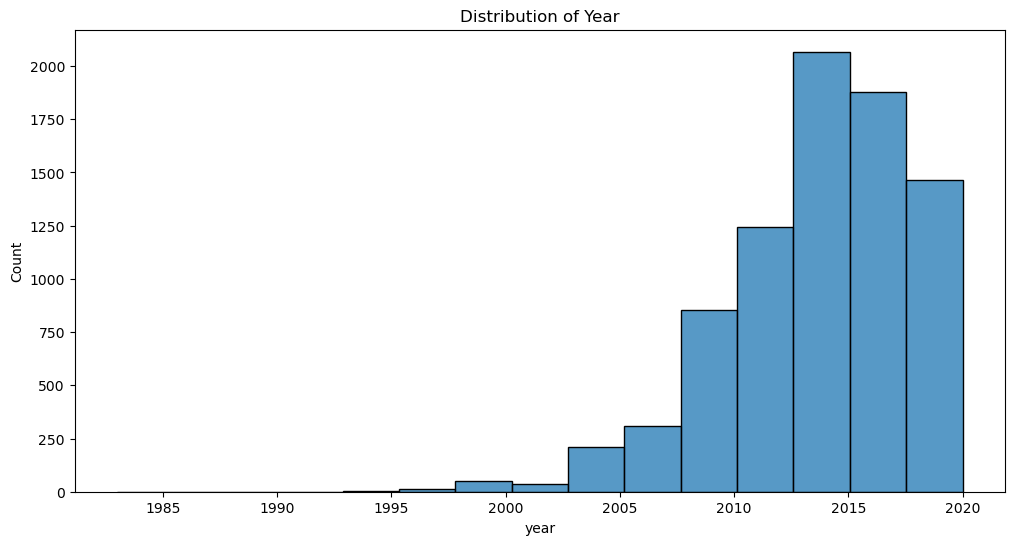

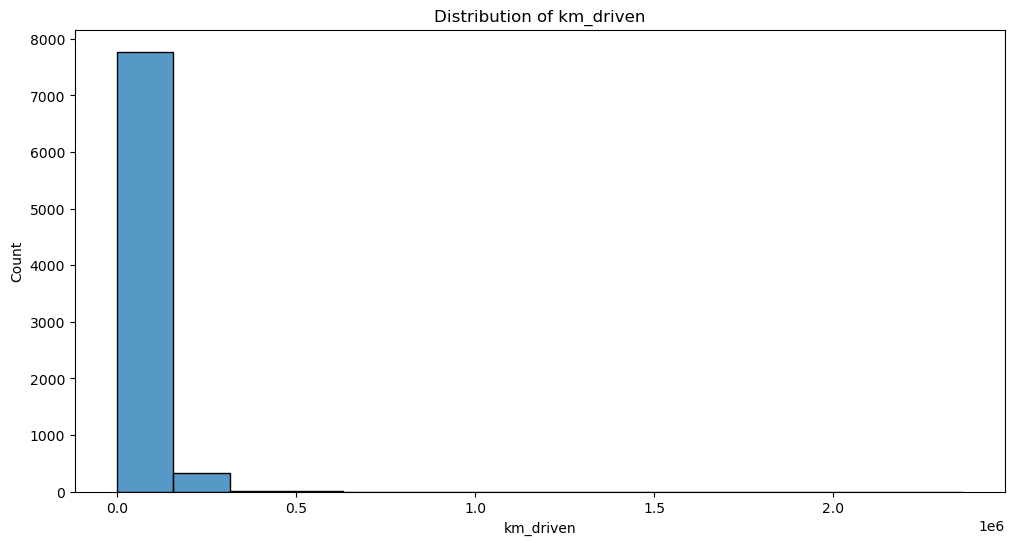

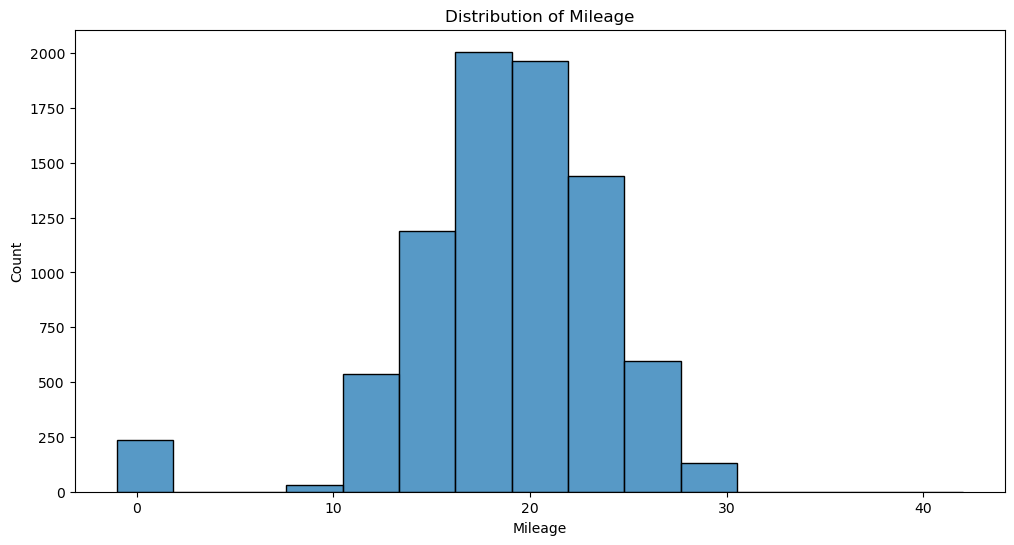

Summary statistics for year:
count    8128.000000
mean     2013.804011
std         4.044249
min      1983.000000
25%      2011.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

Summary statistics for km_driven:
count    8.128000e+03
mean     6.981951e+04
std      5.655055e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.800000e+04
max      2.360457e+06
Name: km_driven, dtype: float64

Summary statistics for mileage:
count    8128.000000
mean       18.802005
std         5.165302
min        -1.000000
25%        16.251852
50%        19.100000
75%        22.070000
max        42.000000
Name: mileage, dtype: float64

Missing values in the dataset:
name                            0
year                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 6))
#plt.plot(df['year'])
sns.histplot(df['year'], bins=15)

plt.title("Distribution of Year")
plt.xlabel('year')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['km_driven'], bins=15)
plt.title("Distribution of km_driven")
plt.xlabel('km_driven')
plt.show()

plt.figure(figsize=(12, 6))
#sns.histplot(df['mileage'].dropna(), bins=15)

sns.histplot(df['mileage'], bins=15)
plt.title("Distribution of Mileage")
plt.xlabel('Mileage')
plt.show()

#Problems for convergence
print("Summary statistics for year:")
print(df['year'].describe())
print("\nSummary statistics for km_driven:")
print(df['km_driven'].describe())
print("\nSummary statistics for mileage:")
print(df['mileage'].describe())

print("\nMissing values in the dataset:")
print(df.isnull().sum())


### 4. Scale those three numerical features, use whatever scaler you want

In [14]:
features_to_scale = ['year', 'km_driven', 'mileage']
df = df.dropna(axis = 0, subset=features_to_scale)
features = df[features_to_scale]
scales = StandardScaler()
scaler_features = scales.fit_transform(features)
scaler_features_df = pd.DataFrame(scaler_features, columns=features_to_scale)
df[features_to_scale] = scaler_features_df
print("First few rows:")
df.head()


First few rows:


,name,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner
0,Maruti Swift Dzire VDI,0.048464,450000,1.338363,0.890224,1248.0,74.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,Skoda Rapid 1.5 TDI Ambition,0.048464,370000,0.887411,0.452663,1498.0,103.52,5.0,1.0,0.0,0.0,1.0,0.0,1.0,2
2,Honda City 2017-2020 EXi,-1.929775,158000,1.241098,-0.213361,1497.0,78.00,5.0,0.0,0.0,1.0,1.0,0.0,1.0,4
3,Hyundai i20 Sportz Diesel,-0.940656,225000,1.011202,0.812780,1396.0,90.00,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0
4,Maruti Swift VXI BSIII,-1.682495,130000,0.887411,-0.523139,1298.0,88.20,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0


### 5. Select Features and Target Variable
Separate X's to y

In [15]:
print("First few rows:")
print(df.head())

target = 'selling_price'
features = df.columns.difference([target])
X = df[features]
y = df[target]

print("First few rows of X:")
print(X.head())
print("First few rows of y:")
print(y.head())


First few rows:
                           name      year  selling_price  km_driven   mileage  \
0        Maruti Swift Dzire VDI  0.048464         450000   1.338363  0.890224   
1  Skoda Rapid 1.5 TDI Ambition  0.048464         370000   0.887411  0.452663   
2      Honda City 2017-2020 EXi -1.929775         158000   1.241098 -0.213361   
3     Hyundai i20 Sportz Diesel -0.940656         225000   1.011202  0.812780   
4        Maruti Swift VXI BSIII -1.682495         130000   0.887411 -0.523139   

   engine  max_power  seats  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0  1248.0      74.00    5.0          1.0       0.0          0.0   
1  1498.0     103.52    5.0          1.0       0.0          0.0   
2  1497.0      78.00    5.0          0.0       0.0          1.0   
3  1396.0      90.00    5.0          1.0       0.0          0.0   
4  1298.0      88.20    5.0          0.0       0.0          1.0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0             

### 6. Plot the distribution of the Target variable 

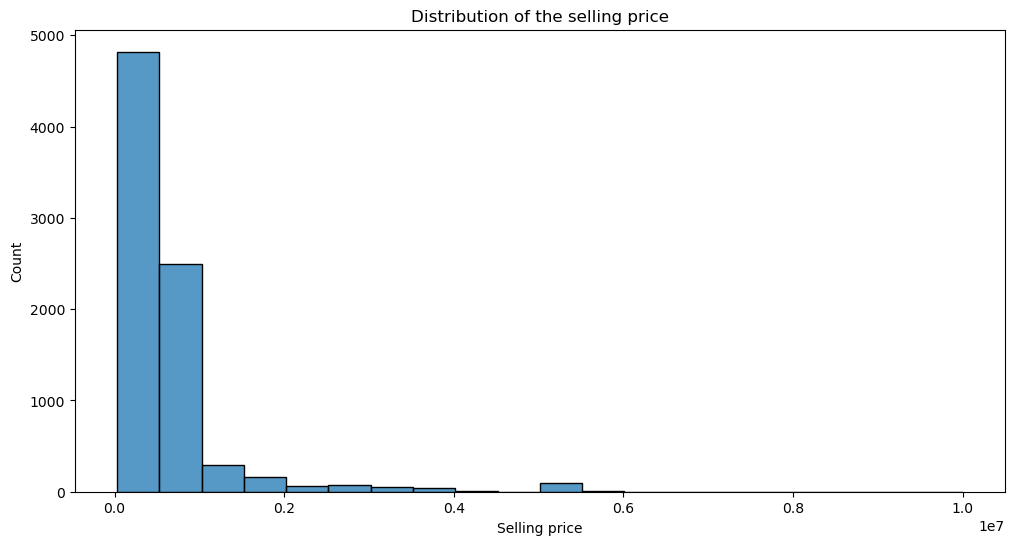

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(y, bins=20)
plt.title("Distribution of the selling price")
plt.xlabel('Selling price')
plt.show()

### 7. Split the Data
Split the dataset into training and testing sets. You should then have four dataset, X_train, X_test, y_train and y_test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

print("Training and Testing split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Training and Testing split:
X_train: (5445, 13)
X_test: (2683, 13)
y_train: (5445,)
y_test: (2683,)


### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [25]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train)

# YOUR CODE GOES HERE
#Use the function ```Predict()``` to predict y, 
#both with your train and test datasets. (have a look at SKlearn documentation to use it)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

#- Compute the train and test Mean Squared Errors.
mean_train = mean_squared_error(y_test, y_train_pred)
mean_test = mean_squared_error(y_test, y_test_pred)

print("\nMean squared error for train:", mean_train)
print("Mean squared error for test:", mean_test)


ValueError: Found input variables with inconsistent numbers of samples: [2683, 5445]


### Task 6: Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

### Task 7 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

### Task 8 : What can you observe ?

### Task 9 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 